In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data=pd.read_csv("bmi_train.csv")

In [5]:
data.head()

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2


In [5]:
data.tail()

,Gender,Height,Weight,Index
395,Male,166,160,5
396,Male,145,130,5
397,Male,178,138,5
398,Male,168,158,5
399,Male,161,155,5


In [9]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [23]:
from sklearn.preprocessing import StandardScaler

# Assuming x_train and x_test are already defined
s = StandardScaler()

# Fit the scaler on the training data and transform it
x_train = s.fit_transform(x_train)

# Transform the test data using the same scaler
x_test = s.transform(x_test)


ValueError: could not convert string to float: 'Male'

In [25]:
gender=LabelEncoder()
data['Gender']=gender.fit_transform(data['Gender'])
data.tail()

,Gender,Height,Weight,Index
395,1,166,160,high_weight
396,1,145,130,high_weight
397,1,178,138,high_weight
398,1,168,158,high_weight
399,1,161,155,high_weight


In [14]:
data.describe()

,Gender,Height,Weight,Index
count,400.000000,400.000000,400.000000,400.000000
mean,0.500000,170.362500,106.060000,3.737500
std,0.500626,16.574011,32.362242,1.370507
min,0.000000,140.000000,50.000000,0.000000
25%,0.000000,156.000000,80.000000,3.000000
50%,0.500000,171.000000,106.500000,4.000000
75%,1.000000,184.000000,136.250000,5.000000
max,1.000000,199.000000,160.000000,5.000000


In [6]:
bins=[0,1,2,3,4,5,6]
label=['mal_nutricious','less_weight','slight_low','okay','slightly_higher','high_weight']
data['Index']=pd.cut(data['Index'],bins=bins,labels=label,right=False)
data['Index']


0      slightly_higher
1      slightly_higher
2          high_weight
3          high_weight
4           slight_low
            ...       
395        high_weight
396        high_weight
397        high_weight
398        high_weight
399        high_weight
Name: Index, Length: 400, dtype: category
Categories (6, object): ['mal_nutricious' < 'less_weight' < 'slight_low' < 'okay' < 'slightly_higher' < 'high_weight']

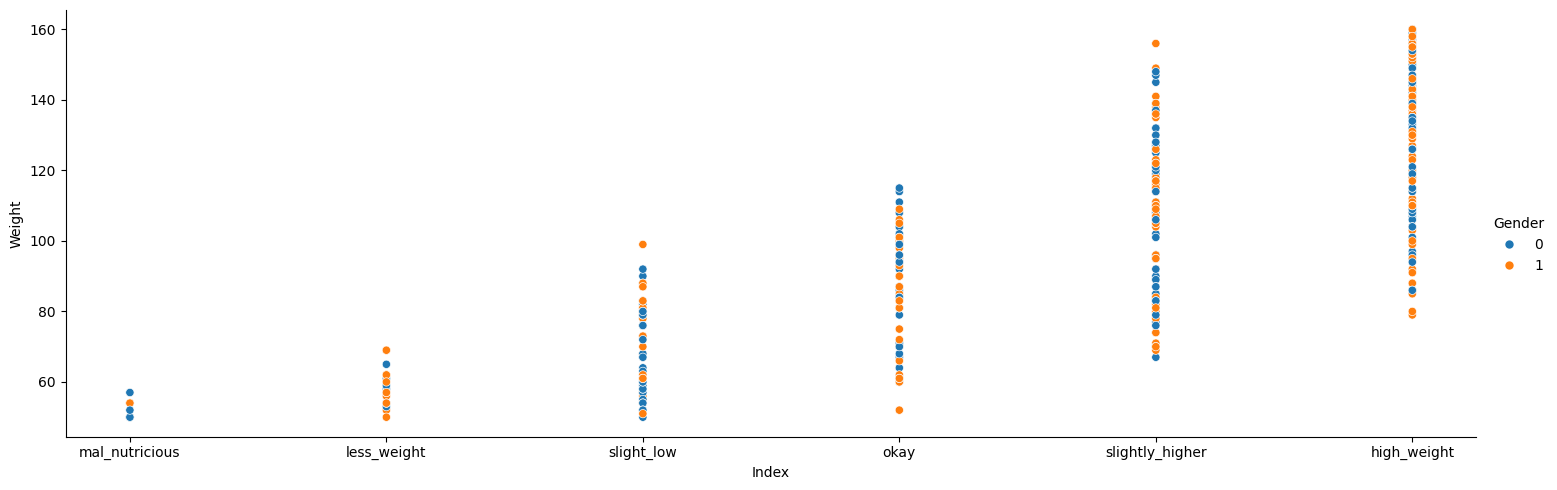

In [56]:
sns.relplot(x='Index',y='Weight',hue='Gender',height=5,aspect=3,data=data)

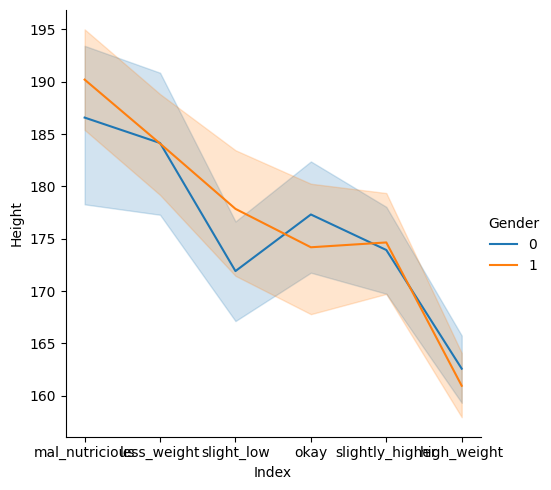

In [57]:


sns.relplot(x='Index',y='Height',hue='Gender',kind='line',data=data)

In [12]:
x=data.drop('Index',axis=1)
y=data['Index']


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming x_train and x_test are pandas DataFrames
# Identify numerical and categorical columns
numerical_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

# Create column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fit and transform the training data
x_train = preprocessor.fit_transform(x_train)

# Transform the test data
x_test = preprocessor.transform(x_test)



In [30]:
clf=svm.SVC()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print(accuracy_score(y_test,pred))

0.825


In [34]:
# a=[[150,55]]

# b=clf.predict(a)



ValueError: X has 2 features, but SVC is expecting 4 features as input.